<a href="https://colab.research.google.com/github/lakshmikanthgr/IITJ-M.Tech-AI-2025-27/blob/main/Question_4/Q4_Decision_Tree_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Question

*Load the IRIS dataset. The dataset consists of 150 samples of iris flowers, each belonging to one of three species (setosa, versicolor, or virginica). Each sample includes four features: sepal length, sepal width, petal length, and petal width.*


1.Visualize the distribution of each feature and the class distribution.

2.Encode the categorical target variable (species) into numerical values.

3.Split the dataset into training and testing sets (use an appropriate ratio).

4.Decision Tree Model


*   Build a decision tree classifier using the training set.
*   Visualize the resulting decision tree.
*   Make predictions on the testing set and evaluate the model's performance using appropriate metrics (e.g., accuracy, confusion matrix).

5.Random Forest Model


*   Build a random forest classifier using the training set.
*   Tune the hyperparameters (e.g., number of trees, maximum depth) if necessary.
*   Make predictions on the testing set and evaluate the model's performance using
appropriate metrics and compare it with the decision tree model.



#### step 1
Load the dataset into the pandas data frame.

In [13]:
# Loading the IRIS data set

from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df["species"] = df["species"].map({0:'setosa', 1:'versicolor',2:'virginica'})

print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)    species
0                  5.1               3.5                1.4               0.2     setosa
1                  4.9               3.0                1.4               0.2     setosa
2                  4.7               3.2                1.3               0.2     setosa
3                  4.6               3.1                1.5               0.2     setosa
4                  5.0               3.6                1.4               0.2     setosa
..                 ...               ...                ...               ...        ...
145                6.7               3.0                5.2               2.3  virginica
146                6.3               2.5                5.0               1.9  virginica
147                6.5               3.0                5.2               2.0  virginica
148                6.2               3.4                5.4               2.3  virginica
149                5.

#### step 2

Optional: Take the backup of the data fram
1.  See the infor and describe of the data


In [14]:
df_copy = df.copy()
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Queston:**

1.   Visualize the distribution of each feature and the class distribution

**Answer:**
1.  Take the dataframe.
2.  feature distribution using histogram/pair plots
**Conculusion:**

Based on the data and histogram plots we can understands, The petal lenghth and width can be consider as strong feature for classification. And sepal width and length overlaps across data.

           sepal length (cm)                                             sepal width (cm)                                               petal length (cm)                                          \
                       count   mean       std  min    25%  50%  75%  max            count   mean       std  min    25%  50%    75%  max             count   mean       std  min  25%   50%    75%   
species                                                                                                                                                                                             
setosa                  50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8             50.0  3.428  0.379064  2.3  3.200  3.4  3.675  4.4              50.0  1.462  0.173664  1.0  1.4  1.50  1.575   
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0             50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4              50.0  4.260  0.469911  3.0  4.0  4.35  4.600   
virginica      

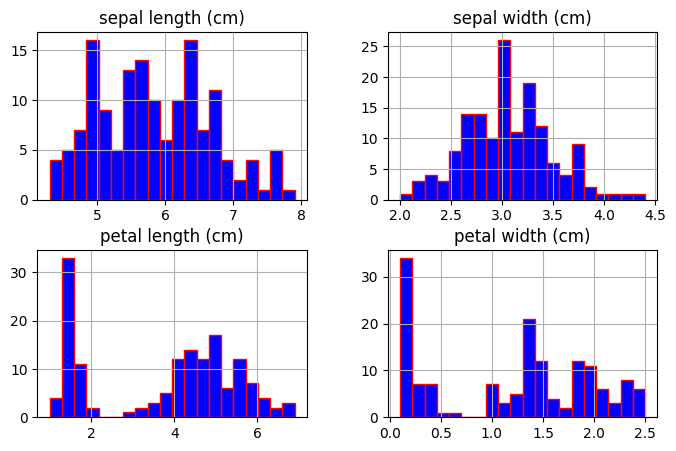

Features are sepal length (cm)


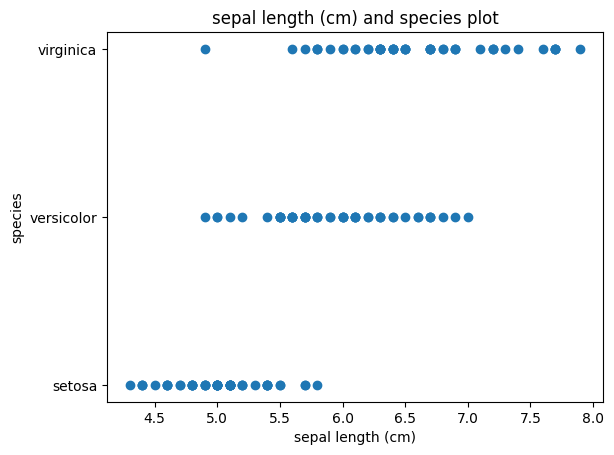

Features are sepal width (cm)


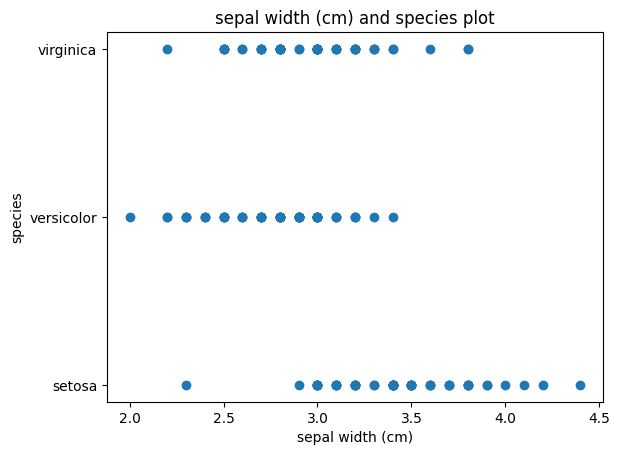

Features are petal length (cm)


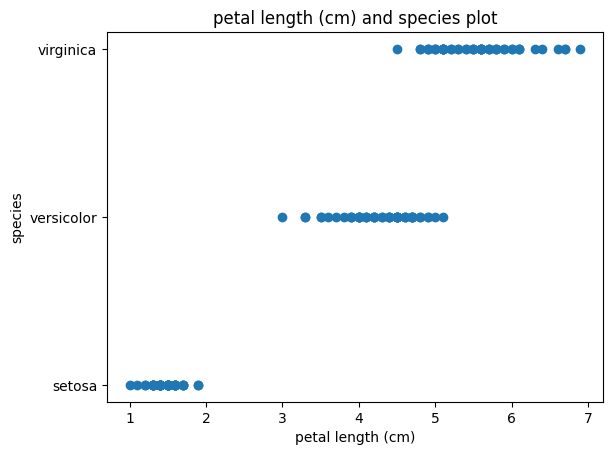

Features are petal width (cm)


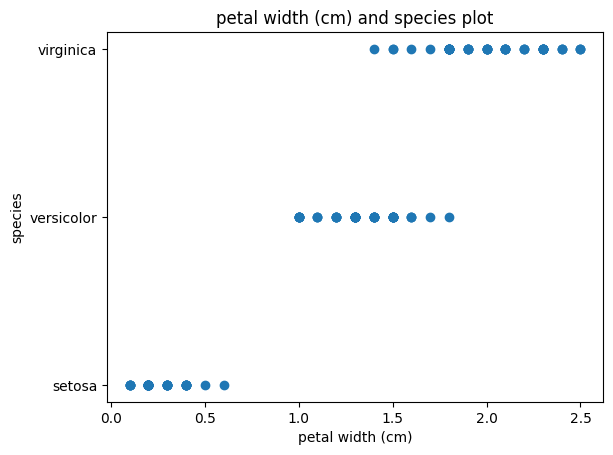

Features are species


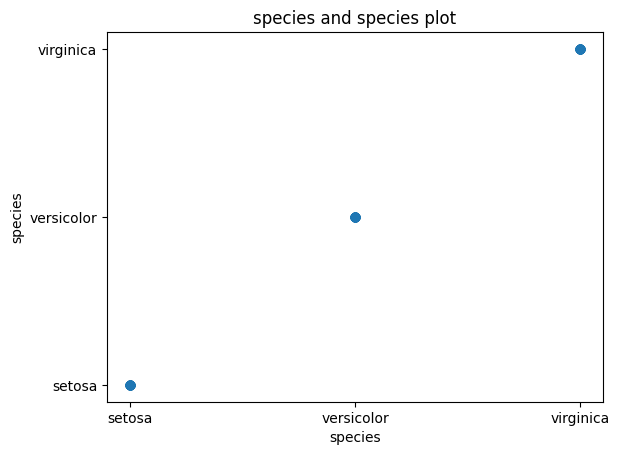

In [16]:
import matplotlib.pyplot as plt

# Set display options to show full output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

print(df.groupby('species').describe())
df.hist(bins=20, figsize=(8,5), color = 'blue', edgecolor = 'red')
plt.show()

for feature in df.columns:
  print(f"Features are {feature}")
  plt.scatter(df[feature],df['species'])
  plt.xlabel(feature)
  plt.ylabel("species")
  plt.title(f"{feature} and species plot")
  plt.show()

**Question:2** Encode the categorical target variable (species) into numerical values.

**Answer**

So the feature "species" is nominal data and it is label data. Since we are going to use Random forest and decison tree. We dont mind the difference/distance between the feature name values. So we can use label encoding.

**Note**: The data already have label encoded. But we added species column with enum values. We again change it to numerical values.



In [24]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
print(df['species'])
df['species'] = encoder.fit_transform(df['species'])
print(df['species'].unique())
print(df)


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64
[0 1 2]
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  species
0                  5.1               3.5                1.4               0.2        0
1                  4.9               3.0                1.4               0.2        0
2                  4.7               3.2                1.3               0.2        0
3                  4.6               3.1                1.5               0.2        0
4                  5.0               3.6                1.4               0.2        0
..                 ...               ...                ...               ...      ...
145                6.7               3.0                5.2               2.3        2
146                6.3               2.5                5.0               1.9        2
147                6.5               3.0                5.2          

**Question:3**

Split the dataset into training and testing sets (use an appropriate ratio).

**Answer**:

Split the data into general ratio as 80:20

In [35]:
from sklearn.model_selection import train_test_split

split_ration = 0.8

#Take inputs into one array.
y = df['species']
X = df.drop('species',axis = 1)

X_Train,X_Test, y_Train, Y_Test =  train_test_split(X,y, test_size=1-split_ration, random_state=2)

print(f"Dimension after splits are {X_Train.shape},{X_Test.shape},{y_Train.shape} and {Y_Test.shape}")

Dimension after splits are (120, 4),(30, 4),(120,) and (30,)


**Question:4**

Decision Tree Model

1.   Build a decision tree classifier using the training set.
2.   visualize the resulting decision tree.
3.   Make predictions on the testing set and evaluate the model's performance using appropriate metrics (e.g., accuracy, confusion matrix).

**Answer:**



Current accuracy is 0.9333


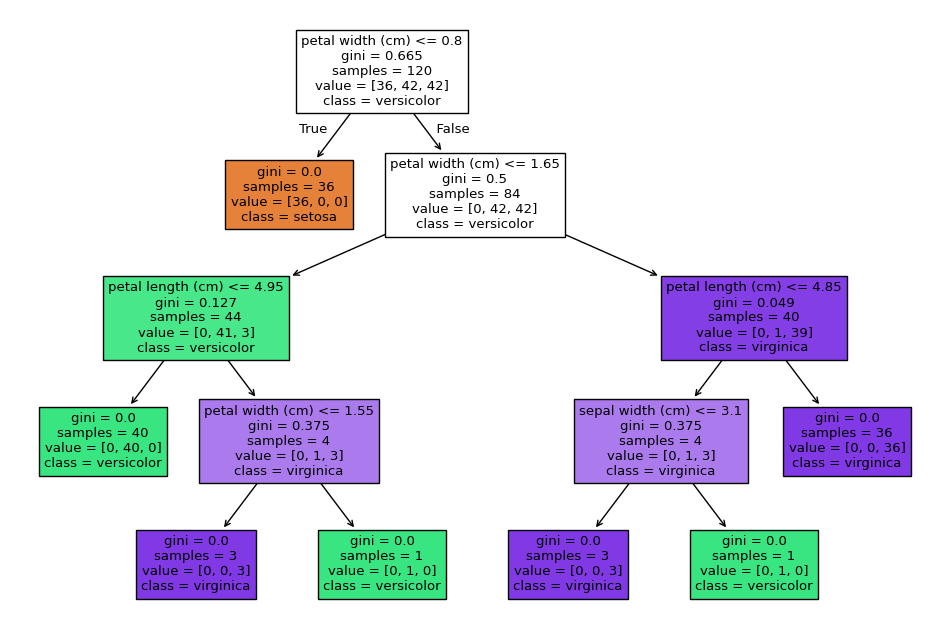

In [44]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

cfr = DecisionTreeClassifier()
cfr.fit(X_Train,y_Train)

#plot tree
plt.figure(figsize=(12,8))
plot_tree(cfr,feature_names=iris.feature_names, class_names=iris.target_names,filled=True)

y_pred = cfr.predict(X_Test)

accuracy = accuracy_score(Y_Test,y_pred)
print(f"Current accuracy is {accuracy:.4f}")

**Question: 5**

Random Forest Model

1.   Build a random forest classifier using the training set.
2.   Tune the hyperparameters (e.g., number of trees, maximum depth) if necessary.
3.   Make predictions on the testing set and evaluate the model's performance using appropriate metrics and compare it with the decision tree model

**Answer**
Nothing much to discuss, Just trained. But for fine tuning we are gonna change the different estimators and depth.


In [46]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Trying Random Forest Classifer with 100 trees
rf_clsfr = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=2)
rf_clsfr.fit(X_Train,y_Train)

rf_pred = rf_clsfr.predict(X_Test)
rf_report = classification_report(Y_Test,y_pred)


rf_accuracy = accuracy_score(Y_Test,rf_pred)
print(f"Random forest accuracy is {rf_accuracy:.4f}")
print(f"Random forest classification report \n {rf_report}")


Random forest accuracy is 0.9667
Random forest classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.88      0.88         8
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("classifier", RandomForestClassifier(random_state=2))])

param_grid = {"classifier__n_estimators":[50,100,150],
              "classifier__max_depth":[None,5,10]}

gs = GridSearchCV(pipeline,param_grid,cv=5, scoring='accuracy')
gs.fit(X_Train,y_Train)

print("Best Parameters:", gs.best_params_)
print("Best Score:", gs.best_score_)

# Evaluate on test data
best_model = gs.best_estimator_
test_accuracy = best_model.score(X_Test, Y_Test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Best Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 50}
Best Score: 0.9583333333333333
Test Accuracy: 0.9667
